In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Predict the salary if the employee using the features provided in the data.

In [136]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
data.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [137]:
data=data.rename(columns={"salary":'salary-target'})

In [138]:
data.drop(['sex'],axis=1,inplace=True)

In [139]:
data

,rank,discipline,yrs.since.phd,yrs.service,salary-target
0,Prof,B,19,18,139750
1,Prof,B,20,16,173200
2,AsstProf,B,4,3,79750
3,Prof,B,45,39,115000
4,Prof,B,40,41,141500
...,...,...,...,...,...
392,Prof,A,33,30,103106
393,Prof,A,31,19,150564
394,Prof,A,42,25,101738
395,Prof,A,25,15,95329


In [140]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
salary-target     int64
dtype: object

# Encoding-
we will convert the rank and disciplin columns into integer data type so that we can take those colum also for doing our machine learning program.

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
le=LabelEncoder()

In [143]:
data['rank']=le.fit_transform(data['rank'])
data['discipline']=le.fit_transform(data['discipline'])

In [144]:
data

,rank,discipline,yrs.since.phd,yrs.service,salary-target
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# EDA ---

Exploratory Data Analysis (EDA): EDA process will give us the batter understanding towards the pattern of Dataset

In [145]:
data.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
salary-target    int64
dtype: object

In [146]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
salary-target    0
dtype: int64

<AxesSubplot:>

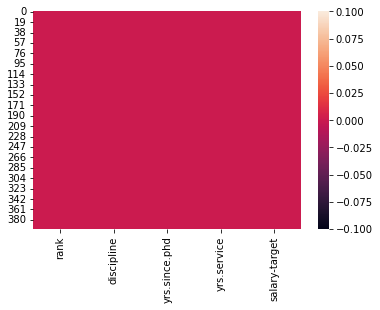

In [147]:
sns.heatmap(data.isnull())

Describing datasets

In [148]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,salary-target
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,113706.458438
std,0.757486,0.498682,12.887003,13.006024,30289.038695
min,0.000000,0.000000,1.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,231545.000000


From the above outcomes we can say that

1.High standard deviation is present in yrs.since.phd, yrs.service columnsand target. hence data is  less spreded .we can say chances of few outliers are present.

2.Mean values & 50%(Median) values shows us skewness present in yrs.since.phd and yrs.service columns.

3.Gap is present between 75%tile and the maximum value, Hence here also the chances of few outliers present.

Skewness

In [149]:
import warnings
warnings.filterwarnings("ignore")

In [150]:
data.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary-target    0.714568
dtype: float64

In [151]:
from scipy.stats import skew

rank
-1.146809479700352


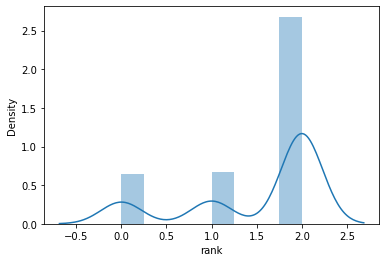

discipline
-0.1770116626350349


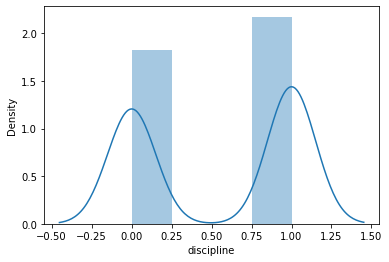

yrs.since.phd
0.29974153157458827


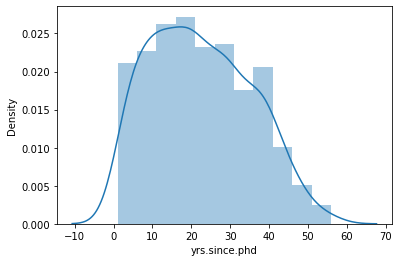

yrs.service
0.6481088240680348


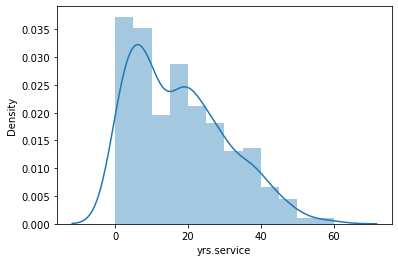

salary-target
0.7118657337591157


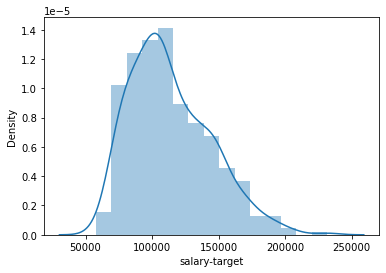

In [152]:
for col in data:
    print(col)
    print(skew(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()
    

Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae230c52e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae230c5a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae230b7f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae230d2160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae230d24f0>],
 'means': []}

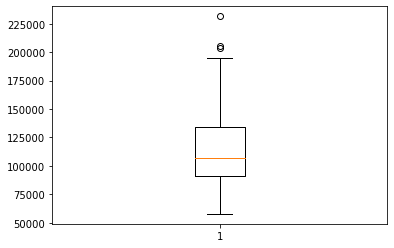

In [153]:
plt.boxplot(data['salary-target'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae2312ca30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae2313a190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae2312c760>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae2313a8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae2313abe0>],
 'means': []}

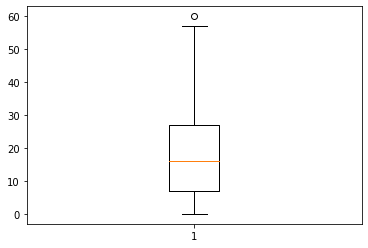

In [154]:
plt.boxplot(data['yrs.service'])

Corelation-Test

This test gives us the batter understanding of covariance. corelation tells us how correleted the variables are to each other

In [155]:
data.corr()

,rank,discipline,yrs.since.phd,yrs.service,salary-target
rank,1.000000,-0.086266,0.525500,0.447499,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.334745
salary-target,0.522207,0.156084,0.419231,0.334745,1.000000


In [156]:
data.corr()['salary-target'].sort_values()

discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary-target    1.000000
Name: salary-target, dtype: float64

<AxesSubplot:>

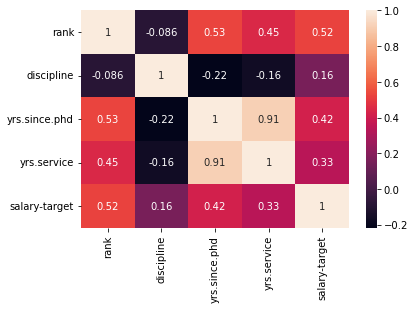

In [157]:
sns.heatmap(data.corr(),annot=True)

From the above outcomes we can say that:

1."discipline" has 16% correlation with the target column which can be considered as a poor bond.

2."yrs.service" has 33 percent correlation with the target column which can be considered as avg bond.

3."yrs.since.phd" has 42 percent correlation with the target column which can be considered as a good bond.

4."rank" has 52 percent correlation with the target column which can be considered as a good bond.

# Data Preprocessing

# Data Cleaning

Removing Skewness with Squreroot Transformation Technique

In [158]:
from scipy.stats import skew

In [159]:
data['yrs.service']=np.sqrt(data['yrs.service'])

In [160]:
data['salary-target']=np.sqrt(data['salary-target'])

In [161]:
print("we removed skewness from colum yrs.service and salary-target--->\nyrs.service :",skew(data['yrs.service']),"\nsalary-target:",skew(data['salary-target']))


we removed skewness from colum yrs.service and salary-target--->
yrs.service : -0.15974634996880785 
salary-target: 0.4190311364173613


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

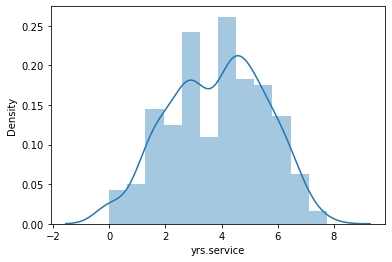

In [163]:
sns.distplot(data['yrs.service'])

<AxesSubplot:xlabel='salary-target', ylabel='Density'>

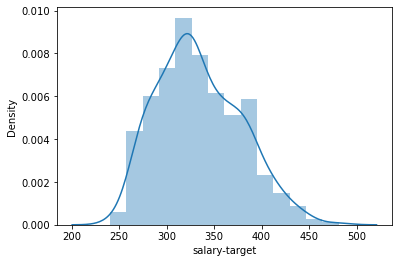

In [164]:
sns.distplot(data['salary-target'])

Removing Outliers

In [179]:
import scipy
from scipy.stats import zscore

In [180]:
z=np.abs(zscore(data))
z

,rank,discipline,yrs.since.phd,yrs.service,salary-target
0,0.649257,0.915403,0.257550,0.238150,0.899789
1,0.649257,0.915403,0.179854,0.095207,1.864382
2,0.672564,0.915403,1.422982,1.240879,1.183125
3,0.649257,0.915403,1.762533,1.417771,0.108938
4,0.649257,0.915403,1.374055,1.510926,0.952946
...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.965464,0.301473
393,0.649257,1.092415,0.674796,0.306640,1.223152
394,0.649257,1.092415,1.529446,0.684323,0.350163
395,0.649257,1.092415,0.208623,0.020379,0.582759


In [181]:
threshold=3
print(np.where(z>3))

(array([43], dtype=int64), array([4], dtype=int64))


In [182]:
data_new=data[(z<3).all(axis=1)]
data_new.shape

(396, 5)

In [183]:
loss_percent=(397-393)/397*100
print(loss_percent,"%")

1.0075566750629723 %


Training phase

In [184]:
data_new.head(1)

,rank,discipline,yrs.since.phd,yrs.service,salary-target
0,2,1,19,4.242641,373.831513


In [185]:
x=data_new.iloc[:,0:-1]
x.shape

(396, 4)

In [186]:
y=data_new.iloc[:,-1]
y.shape

(396,)

In [187]:
lr=LinearRegression()

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [189]:
lr.fit(x_train, y_train)

LinearRegression()

In [190]:
lr.score(x_train, y_train)

0.3954851602126689

In [203]:
pred=lr.predict(x_test)
print("predicted Happiness Score :\n",pred)
print("Actual Happiness Score :\n",y_test)

predicted Happiness Score :
 [313.85037102 335.76465431 329.69647595 357.61139604 344.41678417
 270.87431521 369.54109609 370.80966211 296.72388315 349.41369072
 353.69310909 347.76483975 356.39808613 357.95648863 350.91853742
 349.226882   361.11768861 335.42436024 349.14891421 365.46772702
 343.59112553 340.32660651 339.10849807 354.30216331 330.34120345
 317.56011924 310.95943147 312.63226258 347.32175154 358.86411552
 291.23898688 343.80772995 268.97892066 336.9142536  294.1792397
 329.12309501 272.59645959 295.08901572 361.20434747 330.30553017
 368.1261072  369.99091184 349.83593622 343.43119605 293.43027646
 356.10965796 357.03695285 294.38105284 348.91268404 367.02416254
 294.4799615  294.03933068 349.15170229 297.72932929 348.8046365
 289.37665137 383.91857716 342.22737275 345.02583839 314.45942524
 309.00030111 314.13667028 351.24280035 355.50060374 289.98570559
 334.70881873 376.46959457 296.91617838 355.50060374 291.23898688
 369.785973   350.57932884 335.6965149  281.55590

In [204]:
mean_squared_error(y_test,pred) 

1195.0616699374

In [205]:
np.sqrt(mean_squared_error(y_test,pred))

34.56966401250379

In [207]:
from sklearn.metrics import r2_score

In [209]:
print(r2_score(y_test,pred))

0.2887695932437947


In [ ]:
conclusion : We have achived only 39 % accuracy..we can say our model not working well.